In [2]:
from pytket import Circuit
from pytket.circuit.display import render_circuit_jupyter

In [3]:
circ = Circuit(1, 1)
circ.H(0)
render_circuit_jupyter(circ)

In [4]:
# pytket, measure
circ.measure_all()
render_circuit_jupyter(circ)

In [5]:
# step 2 :test ibm qiskit
from pytket.extensions.qiskit import AerBackend
backend = AerBackend()
# supported gates
backend.required_predicates

[NoSymbolsPredicate,
 GateSetPredicate:{ CnX ZZPhase YYPhase XXPhase PhasedX Reset Rx H SXdg Measure Tdg SWAP T CCX Sdg S CU3 Y CU1 Unitary2qBox X SX noop RangePredicate Unitary1qBox Z Barrier U2 Ry Rz U3 U1 TK1 CX CY CZ CSWAP }]

In [6]:
handle = backend.process_circuit(circ, n_shots=10, seed=1)
shots = backend.get_result(handle).get_shots()
print(shots)

[[1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]]


In [7]:
# get shots summary
counts = backend.get_result(handle).get_counts()
print(counts)

Counter({(0,): 7, (1,): 3})


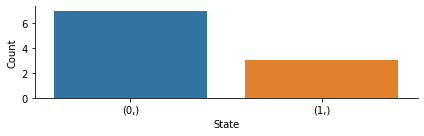

In [8]:
# plot histogram
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_counts(counts):
    counts_record = [{"State":state, "Count":count} for state, count in counts.items()]
    count_df = pd.DataFrame().from_records(counts_record)
    sns.catplot(x='State', y='Count', kind='bar', data=count_df, aspect=3, height=2)
    plt.show()

plot_counts(counts)

In [9]:
# step3: construct complex circuits
n_qubits = 3
n_bits = 3
circ2 = Circuit(n_qubits, n_bits)

circ2.Rx(0.5, 1) # qubit 1 X roate pi/2
circ2.Rz(0.25, 0)
circ2.CX(0, 2)
circ2.measure_all()
render_circuit_jupyter(circ2)

In [10]:
# convert qiskit and pytket circuit
from qiskit import QuantumCircuit
from math import pi
qc = QuantumCircuit(3)
qc.h(0)
qc.cx(0, 1)
qc.rz(pi/2, 1)
print(qc)

     ┌───┐                
q_0: ┤ H ├──■─────────────
     └───┘┌─┴─┐┌─────────┐
q_1: ─────┤ X ├┤ Rz(π/2) ├
          └───┘└─────────┘
q_2: ─────────────────────
                          


In [11]:
from pytket.extensions.qiskit import qiskit_to_tk, tk_to_qiskit
circ = qiskit_to_tk(qc)
circ.CX(1,2)
render_circuit_jupyter(circ)

In [12]:
qc2 = tk_to_qiskit(circ)
print(qc2)

     ┌───┐                     
q_0: ┤ H ├──■──────────────────
     └───┘┌─┴─┐┌─────────┐     
q_1: ─────┤ X ├┤ Rz(π/2) ├──■──
          └───┘└─────────┘┌─┴─┐
q_2: ─────────────────────┤ X ├
                          └───┘


In [13]:
# Import circuits saved as QASM files
from pytket import Circuit, Qubit
from pytket.qasm import circuit_to_qasm, circuit_from_qasm

qasmfile = '../qasm_files/LiHJordanWignerMapper.qasm'
qc4 = circuit_from_qasm(qasmfile)
#print(qc4.get_commands())
# You can also save a circuit as a QASM file using the following code:
#qasmfile2 = 'LiHJordanWignerMapper2.qasm'
#circuit_to_qasm(qc4, qasmfile2)

# In case you want to use Qiskit you can use
#qc4_qiskit = tk_to_qiskit(qc4)
#print(qc4_qiskit.qasm(filename = 'LiHJordanWignerMapper.qasm'))

In [14]:
# load circuit on IBMQ
from qiskit import IBMQ
from pytket import Circuit
from pytket.extensions.qiskit import IBMQEmulatorBackend

IBMQ.load_account()
IBMQ.providers()

[<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>]

In [15]:
IBMQ.get_provider(hub='ibm-q')
# or
IBMQ.get_provider(group='open')

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [16]:
# create an IBMQEmulatorBackend
import warnings
warnings.filterwarnings('ignore')

IBM_backend = IBMQEmulatorBackend('ibmq_belem', hub='ibm-q', group='open', project='main')

In [17]:
# define a sample circuit
circ3 = Circuit(2, 2)
circ3.Rx(0.3, 0).Ry(0.5, 1).CRz(-0.6, 1, 0)

from pytket.circuit.display import render_circuit_jupyter
circ3.measure_all()
render_circuit_jupyter(circ3)
print(IBM_backend.backend_info.gate_set) # view special ibm_backend's emulator supported gates


{<OpType.Rz: 33>, <OpType.U3: 34>, <OpType.U2: 35>, <OpType.U1: 36>, <OpType.CX: 39>, <OpType.SX: 28>, <OpType.X: 20>, <OpType.noop: 57>, <OpType.Measure: 58>, <OpType.Reset: 60>}


In [13]:
# check circuit whether match ibmq_backend
IBM_backend.valid_circuit(circ3)

False

In [16]:
# compile the circuit to this backend
compiled_circIBM = IBM_backend.get_compiled_circuit(circ3)
render_circuit_jupyter(circ3)

In [17]:
IBM_backend.valid_circuit(compiled_circIBM)

True

In [18]:
quantum_handle = IBM_backend.process_circuit(compiled_circIBM, n_shots=10)

In [22]:
quantum_shots = IBM_backend.get_result(quantum_handle).get_shots()
print(quantum_shots)

[[0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [0 1]]


In [23]:
counts = IBM_backend.get_result(quantum_handle).get_counts()
print(counts)

Counter({(0, 1): 5, (0, 0): 3, (1, 1): 2})


In [24]:
# import pandas as pd
from pytket.extensions.qiskit import IBMQBackend

ibmq_b = IBMQBackend("ibmq_belem")
ibmq_b.valid_circuit(compiled_circIBM)

True

In [26]:
# check circuit run status
quantum_handle_ibmq_b = ibmq_b.process_circuit(compiled_circIBM, n_shots=10)
print(ibmq_b.circuit_status(quantum_handle_ibmq_b))


CircuitStatus(status=<StatusEnum.SUBMITTED: 'Circuit has been submitted.'>, message='job is being validated', error_detail=None, completed_time=None, queued_time=None, submitted_time=None, running_time=None, cancelled_time=None, error_time=None, queue_position=None)


In [ ]:
shots = ibmq_b.get_result(quantum_handle_ibmq_b).get_shots()
print(shots)

In [4]:
# compilation passes
from pytket.passes import DecomposeMultiQubitsCX
from pytket.circuit import Circuit
from pytket.circuit.display import render_circuit_jupyter

pass1 = DecomposeMultiQubitsCX()
circ = Circuit(3)
circ.CRz(0.5, 0, 1)
circ.T(2)
circ.CSWAP(2, 0, 1)
render_circuit_jupyter(circ)

In [3]:
# CompilationUnit 从电路进行构造
from pytket.predicates import CompilationUnit

cu = CompilationUnit(circ)
pass1.apply(circ)
circ1 = cu.circuit
print(circ1.get_commands())
render_circuit_jupyter(circ1)

[CRz(0.5) q[0], q[1];, T q[2];, CSWAP q[2], q[0], q[1];]


In [4]:
from pytket.predicates import GateSetPredicate
from pytket.circuit import OpType

# Every CompilationUnit has associated with it a set of 'predicates'
pred1 = GateSetPredicate({OpType.Rz, OpType.T, OpType.Tdg, OpType.H, OpType.CX})
cu = CompilationUnit(circ, [pred1])
# 验证是否与目标predicates相关
cu.check_all_predicates()
pass1.apply(cu)
cu.check_all_predicates()
# 验证所给电路是否满足所给的predicates
pred1.verify(circ1)

False

In [21]:
# combining passes
from pytket.predicates import CompilationUnit
from pytket.passes import SequencePass, OptimisePhaseGadgets, DecomposeMultiQubitsCX
seqpass = SequencePass([DecomposeMultiQubitsCX(), OptimisePhaseGadgets()])
cu = CompilationUnit(circ)
seqpass.apply(cu)
circ1 = cu.circuit
print(circ1.get_commands())
render_circuit_jupyter(circ)
render_circuit_jupyter(circ1)

[CX q[0], q[1];, CX q[2], q[4];, TK1(0.5, 0.5, 0.5) q[0];, TK1(0, 0, 1) q[1];, TK1(0.5, 1, 0.5) q[2];, CX q[0], q[3];, CX q[1], q[4];, CX q[0], q[4];, TK1(0, 1.5, 0) q[3];]


In [8]:
from pytket.passes import CommuteThroughMultis, RemoveRedundancies, RepeatPass

seqpass = SequencePass([CommuteThroughMultis(), RemoveRedundancies()])
reppass = RepeatPass(seqpass)
circ = Circuit(3)
circ.X(0).Y(1).CX(0, 1).Z(0).Rx(1.3, 1).CX(0, 1).Rz(0.4, 0).Ry(0.53, 0).H(1).H(2).Rx(
    1.5, 2
).Rx(0.5, 2).H(2)


[X q[0]; Y q[1]; H q[2]; CX q[0], q[1]; Rx(1.5) q[2]; Z q[0]; Rx(1.3) q[1]; Rx(0.5) q[2]; CX q[0], q[1]; H q[2]; Rz(0.4) q[0]; H q[1]; Ry(0.53) q[0]; ]

In [7]:
render_circuit_jupyter(circ)

In [9]:
cu = CompilationUnit(circ)
reppass.apply(cu)
circ1 = cu.circuit
render_circuit_jupyter(circ1)

In [18]:
# pytket 使用联通图进行定义
from pytket.architecture import Architecture
from pytket.circuit import Node

n = [Node("n", i) for i in range(5)]
arc = Architecture([[n[0], n[1]], [n[1], n[2]], [n[2], n[3]], [n[3], n[4]]])

In [19]:
circ = Circuit(5)
circ.CX(0, 1)
circ.H(0)
circ.Z(1)
circ.CX(0, 3)
circ.Rx(1.5, 3)
circ.CX(2, 4)
circ.X(2)
circ.CX(1, 4)
circ.CX(0, 4)

render_circuit_jupyter(circ)

In [22]:
from pytket.passes import DefaultMappingPass
mapper = DefaultMappingPass(arc)
cu = CompilationUnit(circ)
mapper.apply(cu)
circ1 = cu.circuit
render_circuit_jupyter(circ1)

In [16]:
# decompose SWAP & BRIDGE gates to CX gates
# SWAP ==> 3 CX gates
from pytket.passes import DecomposeSwapsToCXs

pass1 = DecomposeSwapsToCXs(arc)
pass1.apply(cu)
circ2 = cu.circuit

render_circuit_jupyter(circ2)